# R&D via Monte Carlo Markov Chain

This notebook is adapted from the notebook: MC_networkx_numpy_v1.ipynb. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic Structure

In [2]:
#import Project_3_1_3 as pj
#import Project_3_1_1_v3 as pj
import Project_4_2_2_v1 as pj

number of states:  10
10
Nominal total cost of a project:  15.0
Nominal total duration of a project:  8
[[0.1  0.85 0.   0.   0.   0.   0.   0.   0.   0.05]
 [0.   0.1  0.85 0.   0.   0.   0.   0.   0.   0.05]
 [0.   0.   0.1  0.85 0.   0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.1  0.85 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.1  0.85 0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   0.1  0.85 0.   0.   0.05]
 [0.   0.   0.   0.   0.   0.   0.1  0.85 0.   0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.1  0.85 0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]
sum check:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [3]:
P_repeat = pj.P_repeat
P_Ab = pj.P_Ab

transition_matrix = pj.mk_transition_matrix(P_repeat, P_Ab)

print(transition_matrix)

print("sum check: ", pj.sum_check(transition_matrix))


[[0.1  0.85 0.   0.   0.   0.   0.   0.   0.   0.05]
 [0.   0.1  0.85 0.   0.   0.   0.   0.   0.   0.05]
 [0.   0.   0.1  0.85 0.   0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.1  0.85 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.1  0.85 0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   0.1  0.85 0.   0.   0.05]
 [0.   0.   0.   0.   0.   0.   0.1  0.85 0.   0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.1  0.85 0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]
sum check:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# Dynamics

In [4]:
def run_project(state_names, transition_matrix, first_termination_state):
    # iterate until in "Roll_out" or "Abandoned"
    num_states = len(state_names)
    state_choices = [x for x in range(num_states)]
    state_count =   [0 for x in range(num_states)]
    k_state = 0
    past_state_names = [state_names[k_state]]
    state_count[k_state] += 1

    while True:
        k_state = np.random.choice(state_choices, p=transition_matrix[k_state])
        past_state_names.append(state_names[k_state])
        state_count[k_state] += 1
        if k_state >= first_termination_state:
            break

    return (past_state_names, state_count)

## Individual case

In [60]:
P_repeat = 0.05
P_Ab = 0.001
transition_matrix = pj.mk_transition_matrix(P_repeat, P_Ab)
print(transition_matrix)

[[0.05  0.949 0.    0.    0.    0.    0.    0.    0.    0.001]
 [0.    0.05  0.949 0.    0.    0.    0.    0.    0.    0.001]
 [0.    0.    0.05  0.949 0.    0.    0.    0.    0.    0.001]
 [0.    0.    0.    0.05  0.949 0.    0.    0.    0.    0.001]
 [0.    0.    0.    0.    0.05  0.949 0.    0.    0.    0.001]
 [0.    0.    0.    0.    0.    0.05  0.949 0.    0.    0.001]
 [0.    0.    0.    0.    0.    0.    0.05  0.949 0.    0.001]
 [0.    0.    0.    0.    0.    0.    0.    0.05  0.949 0.001]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


In [61]:
past_state_names, state_count = run_project(pj.state_names, transition_matrix,pj.first_termination_state)
print( past_state_names)
print( state_count)

['RnD_1', 'RnD_2', 'RnD_2', 'RnD_3', 'RnD_4', 'Transfer', 'Clearance', 'Role_out_1', 'Role_out_2', 'Succeed']
[1, 2, 1, 1, 1, 1, 1, 1, 1, 0]


In [62]:
state_count

[1, 2, 1, 1, 1, 1, 1, 1, 1, 0]

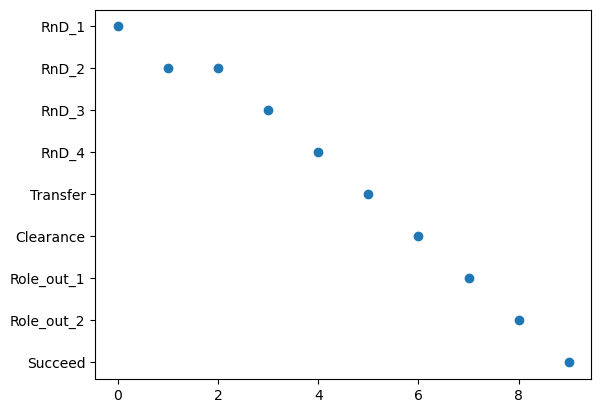

In [63]:
plt.plot(past_state_names, 'o')
plt.gca().invert_yaxis()

# Ensemble

In [8]:
def ensemble_of_project_tries(state_names, transition_matrix, first_termination_state, n_tries = 100):
    all_state_names = []
    all_state_counts = np.empty((0,pj.num_states), dtype=float)

    for k in range(n_tries):
        past_state_names, state_count = run_project(state_names, transition_matrix,first_termination_state)
        all_state_names.append(past_state_names)
        all_state_counts = np.append(all_state_counts, [state_count], axis=0)
    return (all_state_names, all_state_counts)


In [9]:
all_state_names, all_state_counts = ensemble_of_project_tries(
    pj.state_names, transition_matrix, pj.first_termination_state, n_tries = 1000)

In [13]:
# all_state_names

In [14]:
# all_state_counts

## Agregations

In [97]:
def scaled_aggregates( all_state_counts, state_scale_factors):
    all_scaled_states = all_state_counts * state_scale_factors
    sum_scaled_states = np.sum(all_scaled_states, axis=0)
    sum_scaled_projects = np.sum(all_scaled_states, axis=1)
    num_projects = all_scaled_states.shape[0]
    return sum_scaled_states, sum_scaled_projects, num_projects

def masked_states(all_state_counts, idx_mask):
    state_count_mask   = all_state_counts[:,idx_mask]   > 0
    all_masked_state_counts = all_state_counts[state_count_mask,:]
    num_masked_states = all_masked_state_counts.shape[0]
    return all_masked_state_counts, num_masked_states


In [68]:
all_costs_of_states = all_state_counts * pj.costs_of_states
mean_costs_of_states = np.mean(all_costs_of_states, axis=0)
mean_state_count = np.mean(all_state_counts, axis=0)
all_durations_of_states = all_state_counts * pj.durations_of_states
durations_of_projects = np.sum(all_durations_of_states, axis=1)
costs_of_projects = np.sum(all_costs_of_states, axis=1)
# mean_cost_of_project = np.mean(costs_of_projects)
mean_duration = np.mean(durations_of_projects)
duration_ratio = mean_duration / pj.nominal_total_duration
mean_cost = np.mean(costs_of_projects)
cost_ratio = mean_cost / pj.nominal_total_cost
print("duration ratio: ", duration_ratio)
print("cost ratio: ", cost_ratio)

duration ratio:  1.2248625
cost ratio:  1.2252266666666667


In [89]:
def scaled_aggregates( all_state_counts, state_scale_factors):
    all_scaled_states = all_state_counts * state_scale_factors
    sum_scaled_states = np.sum(all_scaled_states, axis=0)
    sum_scaled_projects = np.sum(all_scaled_states, axis=1)
    num_projects = all_scaled_states.shape[0]
    return sum_scaled_states, sum_scaled_projects, num_projects

sum_costs_states, sum_costs_projects, num_projects = scaled_aggregates( all_state_counts, pj.costs_of_states)
sum_durs_states, sum_durs_projects, num_projects = scaled_aggregates( all_state_counts, pj.durations_of_states)

def masked_states(all_state_counts, idx_mask):
    state_count_mask   = all_state_counts[:,idx_mask]   > 0
    all_masked_state_counts = all_state_counts[state_count_mask,:]
    num_masked_states = all_masked_state_counts.shape[0]
    return all_masked_state_counts, num_masked_states


all_success_state_counts, num_success_projects = masked_states(all_state_counts, pj.idx_succeed)
all_abandoned_state_counts, num_abandoned_projects = masked_states(all_state_counts, pj.idx_abandoned)
sum_costs_success_states, sum_costs_success_projects, num_success_projects2 = scaled_aggregates( all_success_state_counts, pj.costs_of_states)
sum_costs_abandoned_states, sum_costs_abandoned_projects, num_abandoned_projects2 = scaled_aggregates( all_abandoned_state_counts, pj.costs_of_states)
assert num_projects == num_success_projects + num_abandoned_projects
assert num_success_projects == num_success_projects2
assert num_abandoned_projects == num_abandoned_projects2
mean_cost_success_projects = sum_costs_success_projects / num_success_projects
mean_cost_abandoned_projects = sum_costs_abandoned_projects / num_abandoned_projects
burdened_cost_success_projects = np.sum(sum_costs_projects) / num_success_projects

rate_abandoned = num_abandoned_projects / num_projects

num_success_projects, num_abandoned_projects




# all_costs_of_states = all_state_counts * pj.costs_of_states
# mean_costs_of_states = np.mean(all_costs_of_states, axis=0)
# mean_state_count = np.mean(all_state_counts, axis=0)
# all_durations_of_states = all_state_counts * pj.durations_of_states
# durations_of_projects = np.sum(all_durations_of_states, axis=1)
# costs_of_projects = np.sum(all_costs_of_states, axis=1)
# # mean_cost_of_project = np.mean(costs_of_projects)
# mean_duration = np.mean(durations_of_projects)
# duration_ratio = mean_duration / pj.nominal_total_duration
# mean_cost = np.mean(costs_of_projects)
# cost_ratio = mean_cost / pj.nominal_total_cost


(6028, 3972)

In [92]:
burdened_cost_success_projects
sum_costs_success_projects

6028

# Loop over P_rep

In [72]:
ens_P_rep = [0.01, 0.05, 0.10, 0.15, .20]
ens_cost_ratio = []
ens_duration_ratio = []
n_tries  = 10000
for k in range(len(ens_P_rep)):
    P_repeat = ens_P_rep[k]
    P_Ab = 0.02
    transition_matrix = pj.mk_transition_matrix(P_repeat, P_Ab)

    all_state_names, all_state_counts = ensemble_of_project_tries(
    pj.state_names, transition_matrix, pj.first_termination_state, n_tries = n_tries)

    all_costs_of_states = all_state_counts * pj.costs_of_states
    mean_costs_of_states = np.mean(all_costs_of_states, axis=0)
    mean_state_count = np.mean(all_state_counts, axis=0)
    all_durations_of_states = all_state_counts * pj.durations_of_states
    durations_of_projects = np.sum(all_durations_of_states, axis=1)
    costs_of_projects = np.sum(all_costs_of_states, axis=1)
    # mean_cost_of_project = np.mean(costs_of_projects)
    mean_duration = np.mean(durations_of_projects)
    duration_ratio = mean_duration / pj.nominal_total_duration
    mean_cost = np.mean(costs_of_projects)
    cost_ratio = mean_cost / pj.nominal_total_cost

    ens_duration_ratio.append(duration_ratio)
    ens_cost_ratio.append(cost_ratio)

ens_duration_ratio, ens_cost_ratio

([0.9411125, 0.979925, 1.0272625, 1.084725, 1.1440375],
 [0.9429666666666667,
  0.9818933333333334,
  1.02982,
  1.08698,
  1.1470666666666667])

In [70]:
all_state_names
mean_costs_of_states

array([2.5056, 2.483 , 2.4538, 2.448 , 2.43  , 1.2121, 2.394 , 2.3872,
       0.    , 0.    ])

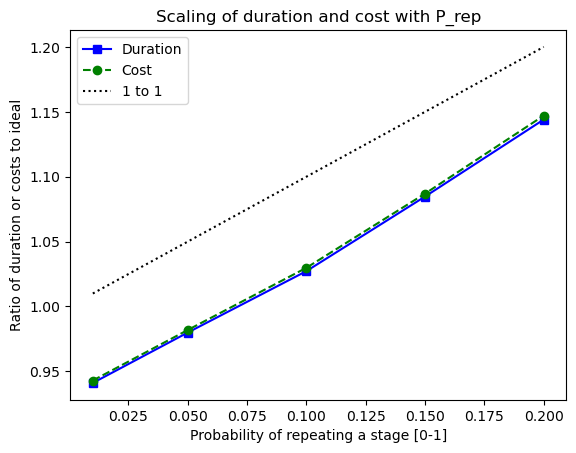

In [73]:
scale_1_to_1 = [1 + x for x in ens_P_rep]
plt.plot(ens_P_rep, ens_duration_ratio, '-bs', ens_P_rep, ens_cost_ratio, '--go',ens_P_rep, scale_1_to_1, ':k' )
plt.xlabel("Probability of repeating a stage [0-1]")
plt.ylabel("Ratio of duration or costs to ideal")
plt.title( "Scaling of duration and cost with P_rep")
plt.legend(["Duration", "Cost", "1 to 1"])

# Loop over P_rep and P_Ab

In [146]:
ens_P_Ab = [0.02,0.04,0.08]
ens_P_rep = [0.01, 0.05, 0.10, 0.15, .20]
ens2_cost_ratio = []
ens2_duration_ratio = []
ens2_burdened_cost_success = []
ens2_rate_abandoned = []
for m in range(len(ens_P_Ab)):
    P_Ab = ens_P_Ab[m]
    ens_cost_ratio = []
    ens_duration_ratio = []
    ens_burdened_cost_success = []
    ens_rate_abandoned = []
    n_tries = 10000
    for k in range(len(ens_P_rep)):
        P_repeat = ens_P_rep[k]
        transition_matrix = pj.mk_transition_matrix(P_repeat, P_Ab)

        all_state_names, all_state_counts = ensemble_of_project_tries(
        pj.state_names, transition_matrix, pj.first_termination_state, n_tries = n_tries)

        # all_costs_of_states = all_state_counts * pj.costs_of_states
        # mean_costs_of_states = np.mean(all_costs_of_states, axis=0)
        # mean_state_count = np.mean(all_state_counts, axis=0)
        # all_durations_of_states = all_state_counts * pj.durations_of_states
        # durations_of_projects = np.sum(all_durations_of_states, axis=1)
        # costs_of_projects = np.sum(all_costs_of_states, axis=1)
        # # mean_cost_of_project = np.mean(costs_of_projects)
        # mean_duration = np.mean(durations_of_projects)
        # duration_ratio = mean_duration / pj.nominal_total_duration
        # mean_cost = np.mean(costs_of_projects)
        # cost_ratio = mean_cost / pj.nominal_total_cost

        sum_costs_states, sum_costs_projects, num_projects = scaled_aggregates( all_state_counts, pj.costs_of_states)
        sum_durs_states, sum_durs_projects, num_projects = scaled_aggregates( all_state_counts, pj.durations_of_states)

        all_success_state_counts, num_success_projects = masked_states(all_state_counts, pj.idx_succeed)
        all_abandoned_state_counts, num_abandoned_projects = masked_states(all_state_counts, pj.idx_abandoned)
        sum_costs_success_states, sum_costs_success_projects, num_success_projects2 = scaled_aggregates( all_success_state_counts, pj.costs_of_states)
        sum_costs_abandoned_states, sum_costs_abandoned_projects, num_abandoned_projects2 = scaled_aggregates( all_abandoned_state_counts, pj.costs_of_states)
        mean_cost_success_projects = sum_costs_success_projects / num_success_projects
        mean_cost_abandoned_projects = sum_costs_abandoned_projects / num_abandoned_projects
        burdened_cost_success_projects = np.sum(sum_costs_projects) / num_success_projects

        rate_abandoned = num_abandoned_projects / num_projects

        # ens_duration_ratio.append(duration_ratio)
        # ens_cost_ratio.append(cost_ratio)
        ens_burdened_cost_success.append(burdened_cost_success_projects)
        ens_rate_abandoned.append(rate_abandoned)
    
    # ens2_cost_ratio.append(ens_cost_ratio)
    # ens2_duration_ratio.append(ens_duration_ratio)
    ens2_burdened_cost_success.append(ens_burdened_cost_success)
    ens2_rate_abandoned.append(ens_rate_abandoned)

ens2_burdened_cost_ratio = np.array(ens2_burdened_cost_success) / pj.nominal_total_cost
ens2_burdened_cost_success, ens2_rate_abandoned, ens2_burdened_cost_ratio

([[16.703598820058996,
   17.44959224677934,
   18.51699291461511,
   19.645740450656707,
   21.178282208588957],
  [18.374704327257547,
   19.143194772695676,
   20.553009819268535,
   22.05010195164579,
   23.918404351767904],
  [22.591208365608054,
   24.189003436426116,
   25.980990181742218,
   28.708970099667773,
   31.373491179201487]],
 [[0.1525, 0.1539, 0.1673, 0.1701, 0.185],
  [0.2813, 0.2807, 0.2973, 0.3134, 0.3382],
  [0.4836, 0.5053, 0.5213, 0.5485, 0.5692]],
 array([[1.11357325, 1.16330615, 1.23446619, 1.30971603, 1.41188548],
        [1.22498029, 1.27621298, 1.37020065, 1.4700068 , 1.59456029],
        [1.50608056, 1.61260023, 1.73206601, 1.91393134, 2.09156608]]))

In [34]:
all_state_counts

array([[1., 2., 1., ..., 1., 1., 0.],
       [2., 1., 1., ..., 2., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [49]:
def trans(M):
    return [[M[j][i] for j in range(len(M))] for i in range(len(M[0]))]

In [137]:
scale_1_to_1 = [1 + x for x in ens_P_rep]
plt.plot(ens_P_rep, trans(ens2_duration_ratio), '-bs', ens_P_rep, trans(ens2_cost_ratio), '--go',ens_P_rep, scale_1_to_1, ':k' )
plt.xlabel("Probability of repeating a stage [0-1]")
plt.ylabel("Ratio of duration or costs to ideal")
plt.title( "Scaling of duration and cost with P_rep")
plt.legend(["Duration", "Cost", "1 to 1"])

IndexError: list index out of range

In [117]:
len(ens_P_rep), np.squeeze(ens2_burdened_cost_ratio[0,:])

(5, array([1.05906045, 1.10403656, 1.16878457, 1.23451939, 1.32196651]))

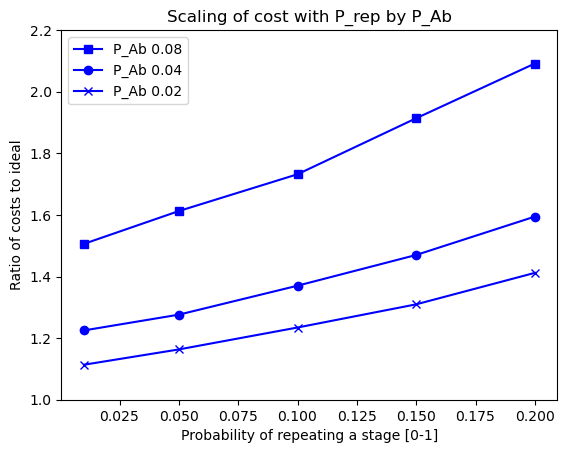

In [150]:
scale_1_to_1 = [1 + x for x in ens_P_rep]
plt.figure()
ax = plt.axes()
ax1 = ax.plot(ens_P_rep, ens2_burdened_cost_ratio[2,:], '-bs',label=f"P_Ab {ens_P_Ab[2]}")
ax2 = ax.plot(ens_P_rep, ens2_burdened_cost_ratio[1,:], '-bo',label=f"P_Ab {ens_P_Ab[1]}")
ax3 = ax.plot(ens_P_rep, ens2_burdened_cost_ratio[0,:], '-bx',label=f"P_Ab {ens_P_Ab[0]}")
plt.ylim(1.0,2.2)
# ax4 = ax.plot(ens_P_rep, scale_1_to_1, ':k' )
plt.xlabel("Probability of repeating a stage [0-1]")
plt.ylabel("Ratio of costs to ideal")
plt.title( "Scaling of cost with P_rep by P_Ab")
plt.legend()

In [127]:
ens2_rate_abandoned[0]

[0.0797, 0.0809, 0.084, 0.0838, 0.0962]

In [132]:
def pct(lst_n):
    return [100*x for x in lst_n]

In [21]:
# mean_costs_of_states = np.mean(all_costs_of_states, axis=0)
# mean_costs_of_states

In [22]:
# all_durations_of_states = all_state_counts * pj.durations_of_states
# all_durations_of_states

In [23]:
# durations_of_projects = np.sum(all_durations_of_states, axis=1)
# durations_of_projects

In [24]:
# costs_of_projects = np.sum(all_costs_of_states, axis=1)
# costs_of_projects

In [25]:
# mean_cost_of_project = np.mean(costs_of_projects)
# mean_cost_of_project

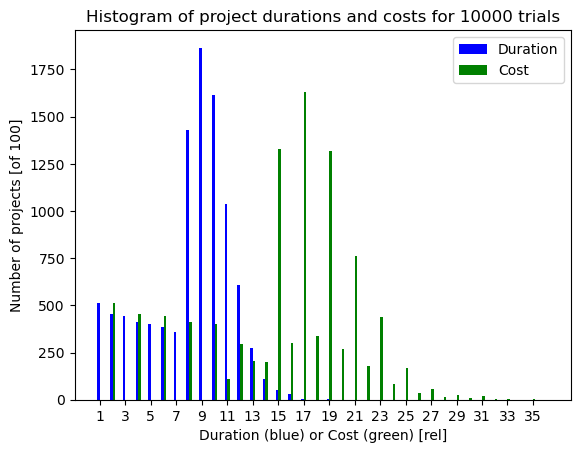

In [80]:
min_cost = int(np.min(costs_of_projects))
max_cost = int(np.max(costs_of_projects))
min_dur  = int(np.min(durations_of_projects))
max_dur  = int(np.max(durations_of_projects))
bin_centers = [x for x in range(min_dur,(max_cost+1),2)]
bins = np.array([x for x in range(min_dur,(max_cost+2))]) - 0.5

plt.hist([durations_of_projects,costs_of_projects],bins=bins, rwidth=0.4, color=["blue", "green"])
plt.xticks(bin_centers)
plt.xlabel("Duration (blue) or Cost (green) [rel]")
plt.ylabel("Number of projects [of 100]")
plt.title(f"Histogram of project durations and costs for {n_tries} trials")
plt.legend(["Duration", "Cost"])


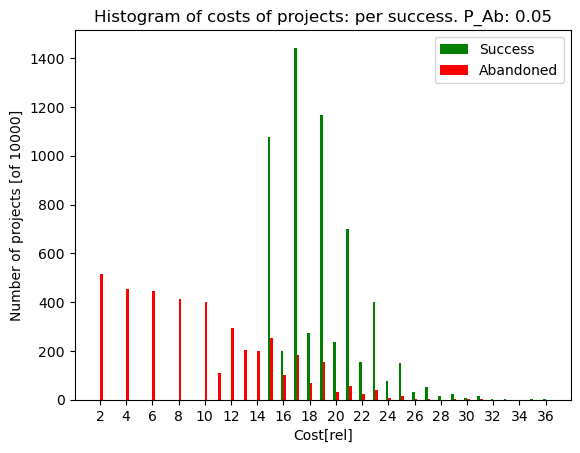

In [96]:
min_cost = int(min(np.min(sum_costs_success_projects),np.min(sum_costs_abandoned_projects)))
max_cost = int(max(np.max(sum_costs_success_projects),np.max(sum_costs_abandoned_projects)))
# min_dur  = int(np.min(durations_of_projects))
# max_dur  = int(np.max(durations_of_projects))
bin_centers = [x for x in range(min_cost,(max_cost+1),2)]
bins = np.array([x for x in range(min_cost,(max_cost+2))]) - 0.5

plt.hist([sum_costs_success_projects,sum_costs_abandoned_projects],bins=bins, rwidth=0.4, color=["green", "red"])
plt.xticks(bin_centers)
plt.xlabel("Cost[rel]")
plt.ylabel(f"Number of projects [of {n_tries}]")
plt.title(f"Histogram of costs of projects: per success. P_Ab: {P_Ab}")
plt.legend(["Success", "Abandoned"])


In [37]:
mask_success = all_state_counts[:,pj.first_termination_state] > 0
mask_abandoned = all_state_counts[:,pj.idx_abandoned] > 0
all_success_state_counts = all_state_counts[mask_success,:]
all_abandoned_state_counts = all_state_counts[mask_abandoned,:]

In [38]:
all_abandoned_state_counts

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 2., 3., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [2., 0., 0., ..., 0., 0., 1.]])

In [39]:
all_costs_of_states = all_state_counts * pj.costs_of_states

In [40]:
all_costs_of_successes = all_success_state_counts * pj.costs_of_states
all_costs_of_abandoned = all_abandoned_state_counts * pj.costs_of_states
costs_of_successes = np.sum(all_costs_of_successes, axis=1)
costs_of_abandoned = np.sum(all_costs_of_abandoned, axis=1)

In [41]:
hist_costs = [costs_of_successes, costs_of_abandoned]
hist_costs

[array([19., 25., 19., ..., 15., 17., 15.]),
 array([ 8., 17.,  2., ...,  8.,  4.,  4.])]

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.530e+02, 1.915e+03,
         2.113e+03, 5.320e+02, 2.600e+02, 1.100e+02, 1.500e+01, 5.000e+00],
        [1.002e+03, 4.750e+02, 8.470e+02, 4.270e+02, 6.600e+02, 3.480e+02,
         2.450e+02, 6.300e+01, 2.400e+01, 4.000e+00, 2.000e+00, 0.000e+00]]),
 array([ 2.  ,  4.75,  7.5 , 10.25, 13.  , 15.75, 18.5 , 21.25, 24.  ,
        26.75, 29.5 , 32.25, 35.  ]),
 <a list of 2 BarContainer objects>)

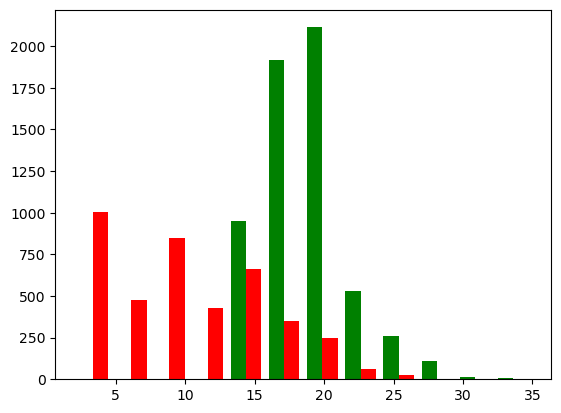

In [42]:
colors = ['green', 'red']
plt.hist(hist_costs, bins=12, color=colors)

In [43]:
# Count how many projects were Abandoned
num_abandoned = np.sum(all_state_counts[:,pj.idx_abandoned])
num_abandoned

4097.0

In [44]:
# Number of undercost projects
np.sum(costs_of_projects < pj.nominal_total_cost)

3140

In [46]:
# rate of abandonment
rate_of_abandonment = num_abandoned / n_tries
rate_of_abandonment

0.4097

In [26]:
# mean_state_count = np.mean(all_state_counts, axis=0)
# mean_state_count

In [27]:
# mean_duration = np.mean(durations_of_projects)
# duration_ratio = mean_duration / np.min(durations_of_projects)
# duration_ratio

In [28]:
# mean_cost = np.mean(costs_of_projects)
# cost_ratio = mean_cost / np.min(costs_of_projects)
# cost_ratio

In [32]:
# This should sum to one: all projects either roll out or are abandoned
np.sum(mean_state_count[pj.first_termination_state:])

1.0

In [25]:
# Cost of successes
cost_of_success = mean_cost_of_project / (1 - rate_of_abandonment)
cost_of_success

7.7

In [26]:
# Ratio: Cost of success / Nominal project cost
cost_of_success / pj.nominal_total_cost

1.1

In [2]:
transition_matrix

NameError: name 'transition_matrix' is not defined